# Importing necessary libraries
*   numpy: for analisis and impulation the data
*   pandas: for numurical operations
*   matplot & seaborn: for visiualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 10})

# Importing dataset
Read dataset as an Excel file.

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ch1.xlsx')
df

,DEPT,GR,NPHI,RHOB,DT
0,3420.0084,4.2898,-0.0028,2.9652,98.8240
1,3420.1608,4.7794,-0.0025,2.9723,98.4884
2,3420.3132,5.5797,-0.0024,2.9697,95.4175
3,3420.4656,6.7180,-0.0022,2.9589,88.9431
4,3420.6180,7.6783,-0.0018,2.9587,82.0068
...,...,...,...,...,...
8027,3570.2748,30.0501,0.1961,2.4019,70.7486
8028,3570.4272,29.0730,0.1955,2.3980,71.6772
8029,3570.5796,31.8036,0.2118,2.3902,71.6982
8030,3570.7320,29.3988,0.2071,2.3788,71.4504


# Insight into the structure and characteristics of data
Provide us with information such as NaN or null data.


In [3]:
print(df.info())
print('-'*50)
print('percentage of null measurment for each feature:','\n', df.isna().sum()*100/len(df.sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8032 entries, 0 to 8031
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPT    8032 non-null   float64
 1   GR      8032 non-null   float64
 2   NPHI    8032 non-null   float64
 3   RHOB    8032 non-null   float64
 4   DT      8032 non-null   float64
dtypes: float64(5)
memory usage: 313.9 KB
None
--------------------------------------------------
percentage of null measurment for each feature: 
 DEPT    0.0
GR      0.0
NPHI    0.0
RHOB    0.0
DT      0.0
dtype: float64


# Ckecking for outliers by boxplot

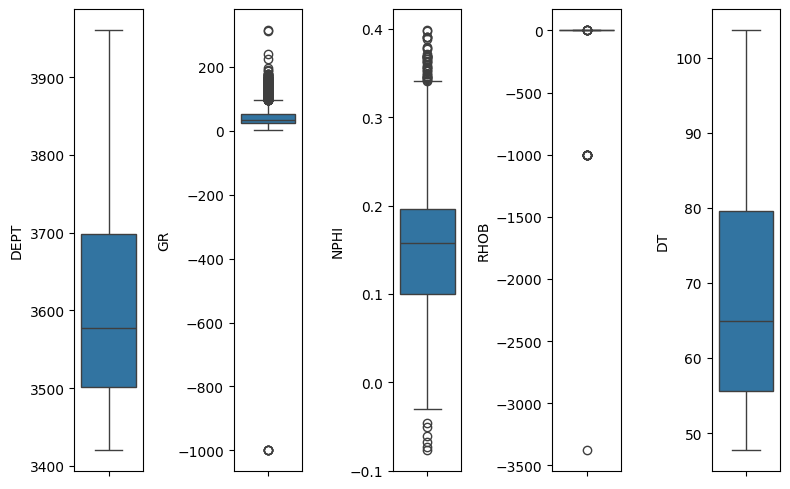

In [4]:
fig, axes = plt.subplots(1,5, figsize=(8,5))
for i, col in enumerate(df, 1):
  j=i-1
  sns.boxplot(data = df[col], ax = axes[j])
  plt.tight_layout()
plt.show()


Some of our data features include outliers, so we remove them by quantile

method Q1-1.5*IQR for lower bound

and Q3+1.5*IQR for upper bound ---> IQR = Q3-Q1







In [45]:
def removing_outli(df):
  d =pd.DataFrame()
  for i in range(len(df.columns)):
    attr = df.columns[i]
    Q = df[attr].quantile([.25, .75])
    Q1 = Q.iloc[0]
    Q3 = Q.iloc[1]
    L= Q1-1.5*(Q3-Q1)
    U = Q3 + 1.5*(Q3-Q1)
    col = df[[attr]]
    d[attr] = (col[( col < U) & (col > L)])
  return d

new_df = removing_outli(df)
new_df.dropna(inplace=True)
new_df.reset_index(drop=True)
new_df.head(10)

,DEPT,GR,NPHI,RHOB,DT
0,3420.0084,4.2898,-0.0028,2.9652,98.8240
1,3420.1608,4.7794,-0.0025,2.9723,98.4884
2,3420.3132,5.5797,-0.0024,2.9697,95.4175
3,3420.4656,6.7180,-0.0022,2.9589,88.9431
4,3420.6180,7.6783,-0.0018,2.9587,82.0068
5,3420.7704,8.4971,-0.0010,2.9657,78.0611
6,3420.9228,9.4317,0.0000,2.9682,75.5151
7,3421.0752,10.0556,0.0013,2.9571,72.1400
8,3421.2276,11.3563,0.0038,2.9421,69.5259
9,3421.3800,17.8671,0.0120,2.9342,68.9503


Boxplot shows that how the outliers removed

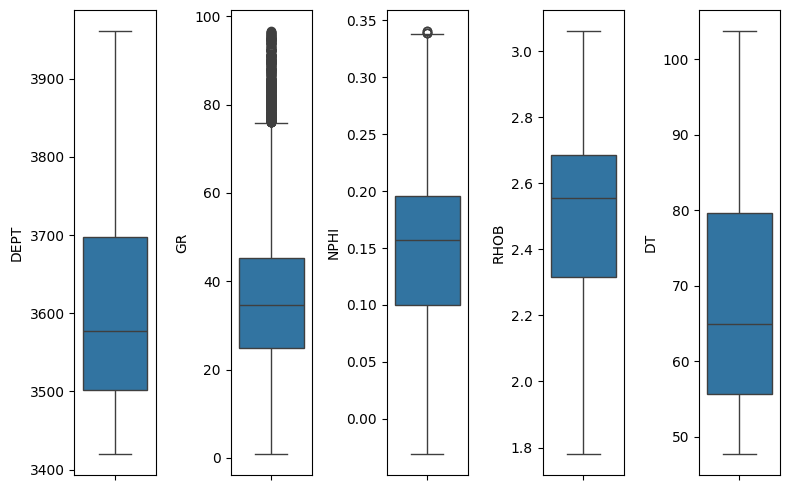

In [37]:
fig, axes = plt.subplots(1,5, figsize=(8,5))
for i, col in enumerate(new_df, 1):
  j=i-1
  sns.boxplot(data = new_df[col], ax = axes[j])
  plt.tight_layout()
plt.show()

Normalize or scale the data to reduce the magnitude and spread of data points while preserving their original meaning.






In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_df = sc.fit_transform(new_df)

Data has been scaled and centrend and also to display the name of the features dataset, return to the data frame


<Figure size 800x300 with 0 Axes>

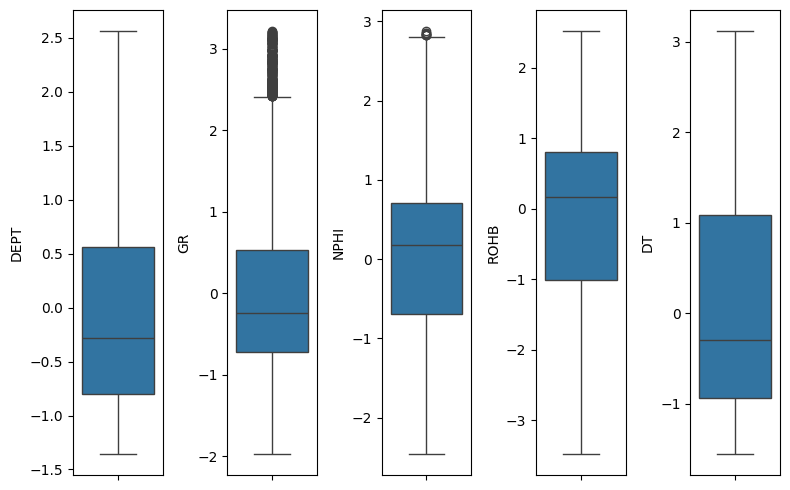

In [56]:
new_df = pd.DataFrame({'DEPT':new_df[:,0], 'GR':new_df[:,1],'NPHI':new_df[:,2], 'ROHB':new_df[:,3],'DT':new_df[:,4]})
fig = plt.figure(figsize=(8,3))

fig, axes = plt.subplots(1,5, figsize=(8,5))
for i, col in enumerate(new_df, 1):
  j=i-1
  sns.boxplot(data = new_df[col], ax = axes[j])
  plt.tight_layout()
plt.show()

The heatmap of the covariance matrix displays the correlation between each pair of features.

<Axes: >

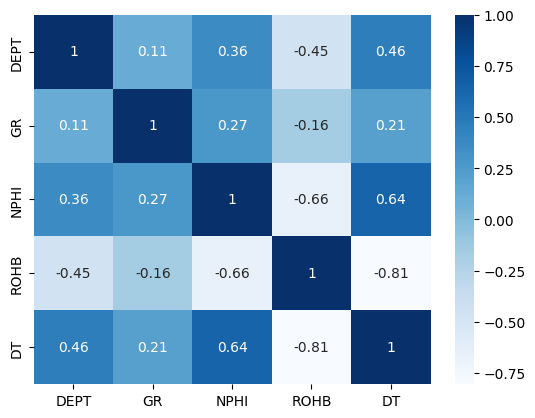

In [57]:
cor= new_df.corr()
sns.heatmap(cor, cmap='Blues', annot=True)

# Performing PCA on the scaled data, by createing an instance of the PCA class and fit it to the data
Evaluate the data variation explained by each PCA component. This parameter helps us to determine how many PCA components.
Choosing the total number of features.

In [58]:
from sklearn.decomposition import PCA
pca= PCA(n_components=5)
pca.fit(new_df.values)
pca_comp = pca.transform(new_df.values)
exp_var = (pca.explained_variance_ratio_)
cum_exp_var = np.cumsum(exp_var)


# Sorting in descending order

In [59]:
exp_var = np.sort(exp_var)[::-1]
cum_exp_var = np.sort(cum_exp_var)[::-1]


A scree plot displays the explained variance of each the principal component captures from the data.

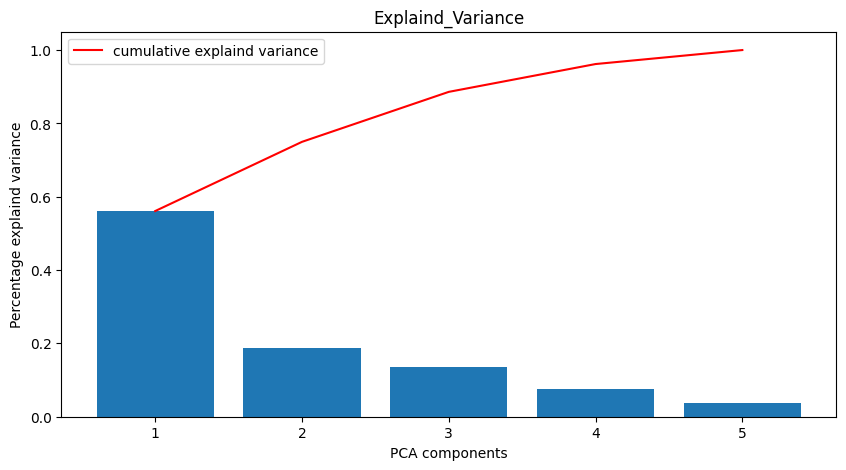

In [60]:
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(10,5))
plt.bar(range(1, len(exp_var)+1), exp_var)
plt.plot(range(1, len(exp_var)+1), cum_exp_var[::-1], 'r', label='cumulative explaind variance')
plt.legend()
plt.title('Explaind_Variance')
plt.xlabel('PCA components')
plt.ylabel('Percentage explaind variance')
plt.show()

A *loading matrix plot* depicts the strength of influence of each characteristic on a principal component. Angles between vectors indicate how characteristics correlate.

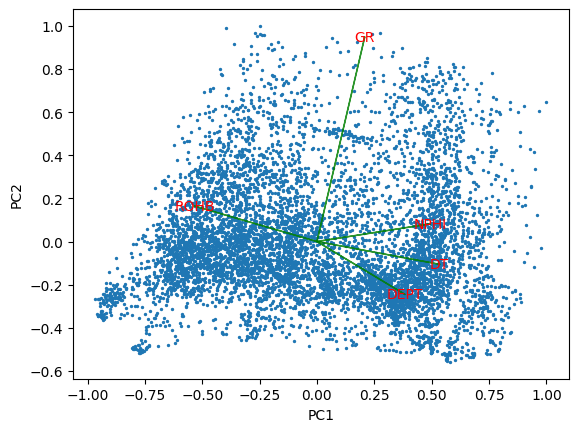

In [61]:
def plot_loading(pca_copm, proj_pca, labels):
     x = pca_comp[:,0]
     y = pca_comp[:,1]
     n = proj_pca.shape[0]
     scalex = 1.0/(x.max())
     scaley = 1.0/(y.max())
     plt.scatter(x * scalex, y * scaley , s=2)
     for i in range(n):
      plt.arrow(0, 0, proj_pca[i,0], proj_pca[i,1], color = 'g', alpha= 0.8)
      plt.text(proj_pca[i,0]*1, proj_pca[i,1]*1, labels[i], color = 'r', ha = 'center', va = 'center')


plot_loading(pca_comp[:,0:5],np.transpose(pca.components_[0:5, :]),list(new_df.columns))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Calculating PCA by a python package "pca" to perform Principal Component Analysis and with its insightful plots.
<br> For more detalies refer to this [link](https://erdogant.github.io/pca/pages/html/Algorithm.html#best-performing-features)


In [62]:
! pip install pca
from pca import pca
model= pca(n_components=5)
pca_comp= model.fit_transform(new_df)
fig, ax = model.plot()
fig, ax = model.scatter()
fig, ax = model.biplot(n_feat= 5)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Best component

In [ ]:
model.results['topfeat']

,PC,feature,loading,type
0,PC1,ROHB,-0.533910,best
1,PC2,GR,0.944735,best
2,PC3,DEPT,0.877417,best
3,PC4,NPHI,0.797494,best
4,PC5,ROHB,-0.732707,best
5,PC5,DT,-0.670223,weak
